In [155]:
using Plots, StatsBase
include("../code/bp_full.jl")

update_factor_bp_new! (generic function with 1 method)

## 1. No leaves

In [47]:
ns = 300 * round.(Int, (2 .^ (4:0.5:7)))
@show ns
f3s = 0.01:0.07:0.36
F = length(f3s)
nflips = [[zeros(n) for n in ns] for f3 in f3s]
navg = 20;

ns = [4800, 6900, 9600, 13500, 19200, 27300, 38400]


In [5]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f3 = $f3 ---")
        f1 = 0.0
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)
        H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
    end
end


#### size 1 of 7: n=4800 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 3 of 6: f3 = 0.15 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 4 of 6: f3 = 0.22 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 5 of 6: f3 = 0.29 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 6 of 6: f3 = 0.36 ---
sum(sum(H, dims = 1) == 1) = 0

#### size 2 of 7: n=6900 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 3 of 6: f3 = 0.15 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 4 of 6: f3 = 0.22 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 5 of 6: f3 = 0.29 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 6 of 6: f3 = 0.36 ---
sum(sum(H, dims = 1) == 1) = 0

#### size 3 of 7: n=9600 ####
--- degree 1 of 6: f3 = 0.01 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 2 of 6: f3 = 0.08 ---
sum(sum(H, dims = 1) == 1) = 0
--- degree 

In [6]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f3 = $f3 ---")
        f1 = 0.0
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)

        s = ones(n)
        efield = [(si,-si) .- 1 for si in s];
        
        ε = Inf
        tol = 1e-12
        max_att = 50
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att
                H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
                @show ε, iters
                if ε < tol 
                    println("Avg $a of $navg: converged after $attempt attempts")  
                    nflips[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips[i][j] /= nconverged
    end
end


#### size 1 of 7: n=4800 ####
--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = (0.0, 19)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 19)
Avg 2 of 20: converged after 2 attempts
(ε, iters) = (0.0, 19)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 4 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 18)
Avg 5 of 20: converged after 4 attempts
(ε, iters) = (0.0, 20)
Avg 6 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 8 of 20: converged after 2 attempts
(ε, iters) = (0.0, 20)
Avg 9 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 19)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 12 of 20: converged after 2 attempts
(ε, iters

(ε, iters) = (0.0, 63)
Avg 11 of 20: converged after 2 attempts
(ε, iters) = (0.0, 60)
Avg 12 of 20: converged after 1 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 49)
Avg 13 of 20: converged after 4 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (-1, 2)
Avg 14 of 20: converged after 5 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 85)
Avg 15 of 20: converged after 3 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 85)
Avg 16 of 20: converged after 2 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 55)
Avg 17 of 20: converged after 2 attempts
(ε, iters) = (0.0, 80)
Avg 18 of 20: converged after 1 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 58)
Avg 19 of 20: con

Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 20)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 12 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 18)
Avg 13 of 20: converged after 3 attempts
(ε, iters) = (0.0, 19)
Avg 14 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 16 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 17 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 18 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 19 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 20)
Avg 20 of 20: converged after 2 attempts
--- degree 2 of 6: f3 = 0.08 ---
(ε, iters) = (0.0, 27)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (0.0, 36)
Avg 2 of 20: converged after 1 a

(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 72)
Avg 16 of 20: converged after 5 attempts
(ε, iters) = (0.0, 63)
Avg 17 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 48)
Avg 18 of 20: converged after 6 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 69)
Avg 19 of 20: converged after 2 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 69)
Avg 20 of 20: converged after 2 attempts
--- degree 6 of 6: f3 = 0.36 ---
(ε, iters) = (28.0, 300)
(ε, iters) = (38.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (24.0, 30

(ε, iters) = (0.0, 27)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 27)
Avg 8 of 20: converged after 2 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 25)
Avg 9 of 20: converged after 2 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 26)
Avg 10 of 20: converged after 3 attempts
(ε, iters) = (0.0, 25)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 26)
Avg 12 of 20: converged after 4 attempts
(ε, iters) = (0.0, 26)
Avg 13 of 20: converged after 1 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 27)
Avg 14 of 20: converged after 2 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (0.0, 26)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (6.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (6.0, 300)
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 24)
Avg 16 of 20: converged after 5 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (8.0, 300)
(ε,

(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 63)
Avg 12 of 20: converged after 4 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 59)
Avg 13 of 20: converged after 5 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 87)
Avg 14 of 20: converged after 10 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (20.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 68)
Avg 15 of 20: converged after 10 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.

--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 1 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 2 of 20: converged after 1 attempts
(ε, iters) = (0.0, 22)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 4 of 20: converged after 3 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 5 of 20: converged after 2 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 21)
Avg 6 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 7 of 20: converged after 1 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 8 of 20: converged after 3 attempts
(ε, iters) = (4.0, 300)
(ε, iters) = (0.0, 22)
Avg 9 of 20: converged after 2 attempts
(ε, iters) = (0.0, 21)
Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 22)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (0.0, 21)
Avg 12 of 20: converged after 1 attempts
(ε, iters) = (4.

Avg 6 of 20: converged after 1 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 67)
Avg 7 of 20: converged after 7 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 59)
Avg 8 of 20: converged after 4 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 82)
Avg 9 of 20: converged after 4 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 64)
Avg 10 of 20: converged after 6 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, ite

(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 102)
Avg 18 of 20: converged after 16 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (24.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 121)
Avg 19 of 20: converged after 20 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 155)
Avg 20 of 20: converged after 5 attempts

#### size 5 of 7: n=19200 ####
--- degree 1 of 6: f3 = 0.01 ---
(ε, iters) = 

(ε, iters) = (0.0, 48)
Avg 19 of 20: converged after 7 attempts
(ε, iters) = (14.0, 300)
(ε, iters) = (0.0, 49)
Avg 20 of 20: converged after 2 attempts
--- degree 5 of 6: f3 = 0.29 ---
(ε, iters) = (0.0, 66)
Avg 1 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (14.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 64)
Avg 2 of 20: converged after 11 attempts
(ε, iters) = (0.0, 69)
Avg 3 of 20: converged after 1 attempts
(ε, iters) = (0.0, 71)
Avg 4 of 20: converged after 1 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (18.0, 300)
(ε, iters) = (0.0, 68)
Avg 5 of 20: converged after 3 attempts
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (16.0, 300)
(ε, iters) = (0.0, 71)
Avg 6 of 20: converged after 5 attempts
(ε, iters) = (16.0, 300)
(ε, iters)

Avg 17 of 20: converged after 17 attempts
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (36.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 206)
Avg 18 of 20: converged after 26 attempts
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.

(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 50)
Avg 7 of 20: converged after 3 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (10.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 46)
Avg 8 of 20: converged after 6 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 49)
Avg 9 of 20: converged after 5 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 54)
Avg 10 of 20: converged after 2 attempts
(ε, iters) = (10.0, 300)
(ε, iters) = (0.0, 52)
Avg 11 of 20: converged after 2 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 46)
Avg 12 of 20: converged after 2 attempts
(ε, iters) = (0.0, 47)
Avg 13 of 20: converged after 1 attempts
(ε, iters) = (0.0, 54)
Avg 14 of 20: converged after 1 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 45)
Avg 15 of 20: converged after 2 attempts
(ε, iters) = (12.0, 300)
(ε, iters) = (0.0, 48)
Avg 16 of 20: converged after

(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (38.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 106)
Avg 10 of 20: converged after 15 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (26.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (0.0, 246)
Avg 11 of 20: converged after 27 at

Avg 9 of 20: converged after 3 attempts
(ε, iters) = (0.0, 36)
Avg 10 of 20: converged after 1 attempts
(ε, iters) = (0.0, 44)
Avg 11 of 20: converged after 1 attempts
(ε, iters) = (0.0, 38)
Avg 12 of 20: converged after 1 attempts
(ε, iters) = (0.0, 38)
Avg 13 of 20: converged after 1 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 39)
Avg 14 of 20: converged after 2 attempts
(ε, iters) = (0.0, 38)
Avg 15 of 20: converged after 1 attempts
(ε, iters) = (0.0, 52)
Avg 16 of 20: converged after 1 attempts
(ε, iters) = (10.0, 300)
(ε, iters) = (10.0, 300)
(ε, iters) = (10.0, 300)
(ε, iters) = (0.0, 36)
Avg 17 of 20: converged after 4 attempts
(ε, iters) = (8.0, 300)
(ε, iters) = (0.0, 38)
Avg 18 of 20: converged after 2 attempts
(ε, iters) = (10.0, 300)
(ε, iters) = (10.0, 300)
(ε, iters) = (0.0, 37)
Avg 19 of 20: converged after 3 attempts
(ε, iters) = (0.0, 40)
Avg 20 of 20: converged after 1 attempts
--- degree 4 of 6: f3 = 0.22 ---
(ε, iters) = (12.0, 300)
(ε, iters) = (12.0, 300)


(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (0.0, 126)
Avg 2 of 20: converged after 10 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (36.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (0.0, 119)
Avg 3 of 20: converged after 12 attempts
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (28.0, 300)
(ε, iters) = (34.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (30.0, 300)
(ε, iters) = (32.0, 300)
(ε, iters) = (36.0, 300)
(ε, iters) = (36.0, 

In [7]:
n_not_converged

0

In [17]:
meansz = [[mean(nflips[i][j][.!isinf.(nflips[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz = [[std(nflips[i][j][.!isinf.(nflips[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

6-element Vector{Vector{Float64}}:
 [0.29852572096351565, 0.30630474799419255, 0.3088555404823105, 0.3103597882503899, 0.3106612719161093, 0.31355312741858643, 0.3151379215298167]
 [0.6110863905338311, 0.6261255335415885, 0.6261128485043135, 0.6379578392086336, 0.6615996591741489, 0.6832774552693802, 0.693461517001298]
 [1.0251509623985, 1.0605439361927704, 1.0975460960908388, 1.1564479055855759, 1.1672620014554893, 1.2240691333048053, 1.2402011119407115]
 [1.842631655347171, 1.8788466476974883, 1.931387366105122, 2.084142751704447, 2.1965769791804886, 2.2537535933590735, 2.338968563632949]
 [3.697129405374568, 3.6410723318477007, 4.064444021299594, 4.3856587424311355, 4.261317327090231, 4.531025802815912, 4.683680623318484]
 [13.369759732985212, 13.49561542269527, 13.416252380374107, 14.693385195240603, 16.02297617112547, 17.490848518265842, 16.966735904050108]

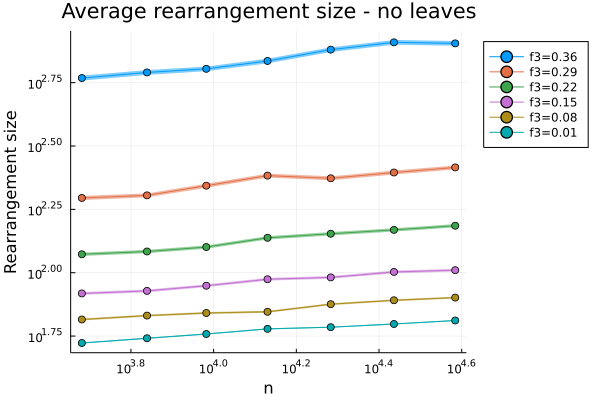

In [48]:
pl = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl, ns, meansz[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=:log10)
end
plot(pl, title="Average rearrangement size - no leaves", legend=:outertopright)

In [490]:
slopes = zeros(length(meansz))
for i in eachindex(meansz)
    y = log.(meansz[i])
    x = log.(ns)
    if i==6
        deleteat!(y,3); deleteat!(x,3)
    end
    pp = scatter(x,y)
    X = hcat(x, ones(length(x)))
    w = X \ y
    xrange = LinRange(extrema(x)...,100)
    plot!(pp, xrange, xrange.*w[1] .+ w[2], label="Slope $(w[1])")
    slopes[i] = w[1]
end
slopes

6-element Vector{Float64}:
 0.10905951722719293
 0.1079874500011654
 0.10858206188863465
 0.1025316231543482
 0.14023337374022035
 0.12401813298826211

## 2. With sub-extensive number of leaves

In [185]:
ns = 300 * round.(Int, (2 .^ (4:0.5:5)))
@show f3s = 0.01:0.09:0.46
F = length(f3s)
nflips2 = [[Float64[] for n in ns] for f3 in f3s]
navg = 20
nleaves = 50

f3s = 0.01:0.09:0.46 = 0.01:0.09:0.46


50

In [178]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        f1 = round(nleaves/n, digits=3)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300)
        b = round(Int, n/N)
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300, B=b, tol=1e-3)
        H = sparse(ldpc_matrix(N, M, NEDGES, LAMBDA, RHO)')
        @show abs(n-N)
    end
end


#### size 1 of 3: n=4800 ####
--- degree 1 of 8: f1=0.01, f3 = 0.01 ---
abs(n - N) = 0
--- degree 2 of 8: f1=0.01, f3 = 0.07 ---
abs(n - N) = 0
--- degree 3 of 8: f1=0.01, f3 = 0.13 ---
abs(n - N) = 0
--- degree 4 of 8: f1=0.01, f3 = 0.19 ---
abs(n - N) = 0
--- degree 5 of 8: f1=0.01, f3 = 0.25 ---
abs(n - N) = 0
--- degree 6 of 8: f1=0.01, f3 = 0.31 ---
abs(n - N) = 0
--- degree 7 of 8: f1=0.01, f3 = 0.37 ---
abs(n - N) = 0
--- degree 8 of 8: f1=0.01, f3 = 0.43 ---
abs(n - N) = 0

#### size 2 of 3: n=6900 ####
--- degree 1 of 8: f1=0.007, f3 = 0.01 ---
abs(n - N) = 300
--- degree 2 of 8: f1=0.007, f3 = 0.07 ---
abs(n - N) = 300
--- degree 3 of 8: f1=0.007, f3 = 0.13 ---
abs(n - N) = 300
--- degree 4 of 8: f1=0.007, f3 = 0.19 ---
abs(n - N) = 300
--- degree 5 of 8: f1=0.007, f3 = 0.25 ---
abs(n - N) = 300
--- degree 6 of 8: f1=0.007, f3 = 0.31 ---
abs(n - N) = 300
--- degree 7 of 8: f1=0.007, f3 = 0.37 ---
abs(n - N) = 300
--- degree 8 of 8: f1=0.007, f3 = 0.43 ---
abs(n - N) = 300

#

In [180]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        f1 = round(nleaves/n, digits=3)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]; Rho = [0,0,1]
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300)
        b = round(Int, n/N)
        M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300, B=b, tol=1e-3)
        s = ones(N)
        efield = [(si,-si) .- 1 for si in s];
        ε = Inf; tol = 1e-12; max_att = 50
        nflips2[i][j] = zeros(N)
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att  
                H = sparse(ldpc_matrix(N, M, NEDGES, LAMBDA, RHO)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
#                 @show ε, iters
                if ε < tol 
#                     println("Avg $a of $navg: converged after $attempt attempts") 
                    nflips2[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips2[i][j] /= nconverged
    end
end


#### size 1 of 3: n=4800 ####
--- degree 1 of 8: f1=0.01, f3 = 0.01 ---
--- degree 2 of 8: f1=0.01, f3 = 0.07 ---
--- degree 3 of 8: f1=0.01, f3 = 0.13 ---
--- degree 4 of 8: f1=0.01, f3 = 0.19 ---
--- degree 5 of 8: f1=0.01, f3 = 0.25 ---
--- degree 6 of 8: f1=0.01, f3 = 0.31 ---
--- degree 7 of 8: f1=0.01, f3 = 0.37 ---
--- degree 8 of 8: f1=0.01, f3 = 0.43 ---

#### size 2 of 3: n=6900 ####
--- degree 1 of 8: f1=0.007, f3 = 0.01 ---
--- degree 2 of 8: f1=0.007, f3 = 0.07 ---
--- degree 3 of 8: f1=0.007, f3 = 0.13 ---
--- degree 4 of 8: f1=0.007, f3 = 0.19 ---
--- degree 5 of 8: f1=0.007, f3 = 0.25 ---
--- degree 6 of 8: f1=0.007, f3 = 0.31 ---
--- degree 7 of 8: f1=0.007, f3 = 0.37 ---
--- degree 8 of 8: f1=0.007, f3 = 0.43 ---

#### size 3 of 3: n=9600 ####
--- degree 1 of 8: f1=0.005, f3 = 0.01 ---
--- degree 2 of 8: f1=0.005, f3 = 0.07 ---
--- degree 3 of 8: f1=0.005, f3 = 0.13 ---
--- degree 4 of 8: f1=0.005, f3 = 0.19 ---
--- degree 5 of 8: f1=0.005, f3 = 0.25 ---
--- degree 6

In [181]:
n_not_converged

0

In [182]:
meansz2 = [[mean(nflips2[i][j][.!isinf.(nflips2[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz2 = [[std(nflips2[i][j][.!isinf.(nflips2[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

8-element Vector{Vector{Float64}}:
 [0.26445091720771646, 0.2737906187584933, 0.26583240753498905]
 [0.3811003988171708, 0.4008584813870175, 0.38278977683306503]
 [0.5384811705609175, 0.5691126394717678, 0.555434358975415]
 [0.773422970650268, 0.8541927801586542, 0.8163347838988833]
 [1.1600958425977002, 1.2682297577675488, 1.2247075389512165]
 [1.9051715790146493, 2.17123194119153, 2.1446856468916695]
 [3.600884746846828, 4.4314333290876595, 4.338658233128611]
 [12.704614115792465, 21.459239541418565, 19.36902581166115]

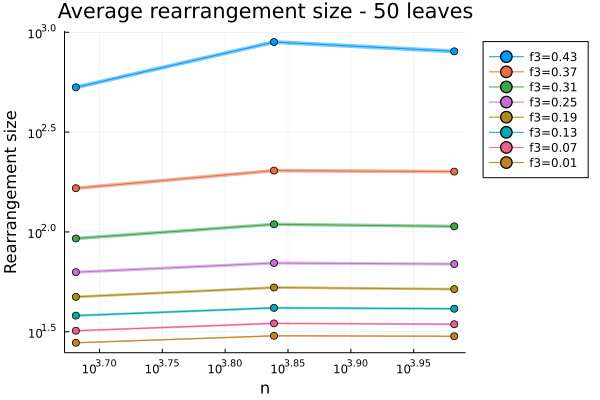

In [183]:
pl2 = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl2, ns, meansz2[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz2[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=:log10)
end
plot(pl2, title="Average rearrangement size - $nleaves leaves", legend=:outertopright)

## 3. With extensive number of leaves

In [114]:
@show ns = 300 * round.(Int, (2 .^ (4:0.4:10)))
f3s = 0.01:0.07:0.36
F = length(f3s)
nflips3 = [[zeros(n) for n in ns] for f3 in f3s]
navg = 30
f1 = 0.01

ns = 300 * round.(Int, 2 .^ (4:0.4:10)) = [4800, 6300, 8400, 11100, 14700, 19200, 25200, 33300, 44100, 58200, 76800, 101400, 133800, 176400, 232800, 307200]


0.01

In [121]:
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]
        Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=8))
        m = Int(nedges/3)
        H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
    end
end


#### size 1 of 16: n=4800 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---
--- degree 3 of 6: f1=0.01, f3 = 0.15 ---
--- degree 4 of 6: f1=0.01, f3 = 0.22 ---
--- degree 5 of 6: f1=0.01, f3 = 0.29 ---
--- degree 6 of 6: f1=0.01, f3 = 0.36 ---

#### size 2 of 16: n=6300 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---
--- degree 3 of 6: f1=0.01, f3 = 0.15 ---
--- degree 4 of 6: f1=0.01, f3 = 0.22 ---
--- degree 5 of 6: f1=0.01, f3 = 0.29 ---
--- degree 6 of 6: f1=0.01, f3 = 0.36 ---

#### size 3 of 16: n=8400 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---
--- degree 3 of 6: f1=0.01, f3 = 0.15 ---
--- degree 4 of 6: f1=0.01, f3 = 0.22 ---
--- degree 5 of 6: f1=0.01, f3 = 0.29 ---
--- degree 6 of 6: f1=0.01, f3 = 0.36 ---

#### size 4 of 16: n=11100 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---
--- degree 3 of 6: f1=0.01, f3 

In [122]:
n_not_converged = 0
for (j,n) in pairs(ns)
    println("\n#### size $j of ", length(ns), ": n=$n ####")
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $F: f1=$f1, f3 = $f3 ---")
        Lambda = [f1, 1-f3-f1, f3]; Rho = [0,0,1]
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
        m = Int(nedges/3)
        s = ones(n)
        efield = [(si,-si) .- 1 for si in s];
        ε = Inf; tol = 1e-12; max_att = 50
        nconverged = 0
        for a in 1:navg
            for attempt in 1:max_att
                H = sparse(ldpc_matrix(n, m, nedges, Lambda, Rho)')
                maxsum = BPFull(H, efield)
                ε, iters = iteration!(maxsum, maxiter=300, damp=0.0, tol=tol,
                    update_f! = update_factor_ms!, update_v! = update_var_ms!)
#                 @show ε, iters
                if ε < tol 
#                     println("Avg $a of $navg: converged after $attempt attempts")  
                    nflips3[i][j] += [abs(b[2]) for b in maxsum.belief]
                    nconverged += 1
                    break
                elseif attempt == max_att 
                    n_not_converged += 1
                    @warn "Not converged"
                end
            end
        end
        nflips3[i][j] /= nconverged
    end
end


#### size 1 of 16: n=4800 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---
--- degree 3 of 6: f1=0.01, f3 = 0.15 ---
--- degree 4 of 6: f1=0.01, f3 = 0.22 ---
--- degree 5 of 6: f1=0.01, f3 = 0.29 ---
--- degree 6 of 6: f1=0.01, f3 = 0.36 ---

#### size 2 of 16: n=6300 ####
--- degree 1 of 6: f1=0.01, f3 = 0.01 ---
--- degree 2 of 6: f1=0.01, f3 = 0.08 ---


LoadError: InterruptException:

In [117]:
n_not_converged

0

In [118]:
meansz3 = [[mean(nflips3[i][j][.!isinf.(nflips3[i][j])]) for j in eachindex(ns)] for i in eachindex(f3s)]
sdsz3 = [[std(nflips3[i][j][.!isinf.(nflips3[i][j])])/sqrt(navg) for j in eachindex(ns)] for i in eachindex(f3s)]

6-element Vector{Vector{Float64}}:
 [0.17827931022338572, 0.1756029942124911, 0.17987489445859345, 0.17952476573106374, 0.17977746416676194, 0.17800253777949718, 0.17917931295344997, 0.17783880935512278, 0.17837229197493903, 0.1786961639418218, 0.1786333493829827, 0.17781484359799082, 0.1778918207752827, 0.0, 0.0, 0.0]
 [0.2743718543909461, 0.2734594889499608, 0.26781409440030457, 0.2632134959960948, 0.2674675259099306, 0.26855431221951115, 0.2678053621938459, 0.2678377043104571, 0.2681796791551136, 0.2678292565955319, 0.26803800162711416, 0.2689124102682706, 0.2684170523172013, 0.0, 0.0, 0.0]
 [0.4082445209167329, 0.4102363442259293, 0.40034626318338284, 0.41044279945506096, 0.3967145059897592, 0.40566157969771355, 0.4062078392111577, 0.405728070301049, 0.40394205406281763, 0.4034393252960329, 0.40318983135092124, 0.40290484011594946, 0.4039995501330516, 0.0, 0.0, 0.0]
 [0.6139442661255773, 0.6309741220965599, 0.6252727751951371, 0.6198113924647902, 0.6256727298041609, 0.6318112018755

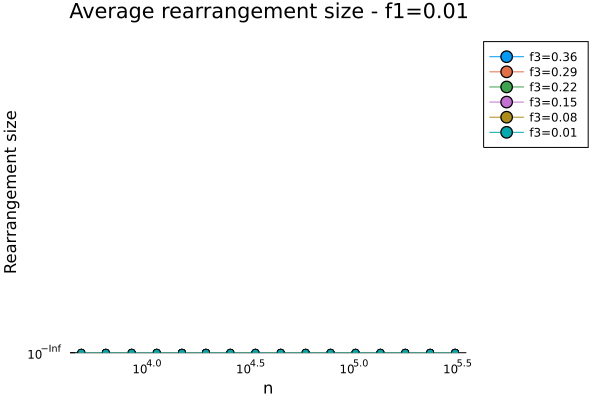

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Stefano\.julia\packages\PlotUtils\es5pb\src\ticks.jl:283
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Stefano\.julia\packages\PlotUtils\es5pb\src\ticks.jl:283


In [119]:
pl3 = Plots.Plot()
for i in reverse(eachindex(f3s))
    plot!(pl3, ns, meansz3[i], label="f3=$(f3s[i])", marker=:circle, ribbon=sdsz3[i],
        xlabel="n", ylabel="Rearrangement size", yaxis=:log10, xaxis=:log10)
end
plot(pl3, title="Average rearrangement size - f1=$f1", legend=:outertopright)

In [120]:
slopes = zeros(length(meansz3))
for i in eachindex(meansz3)
    y = log.(meansz3[i])
    x = log.(ns)
    if i==6
        deleteat!(y,3); deleteat!(x,3)
    end
    pp = scatter(x,y)
    X = hcat(x, ones(length(x)))
    w = X \ y
    xrange = LinRange(extrema(x)...,100)
    plot!(pp, xrange, xrange.*w[1] .+ w[2], label="Slope $(w[1])")
    slopes[i] = w[1]
end
[f3s slopes]

6×2 Matrix{Float64}:
 0.01  NaN
 0.08  NaN
 0.15  NaN
 0.22  NaN
 0.29  NaN
 0.36  NaN

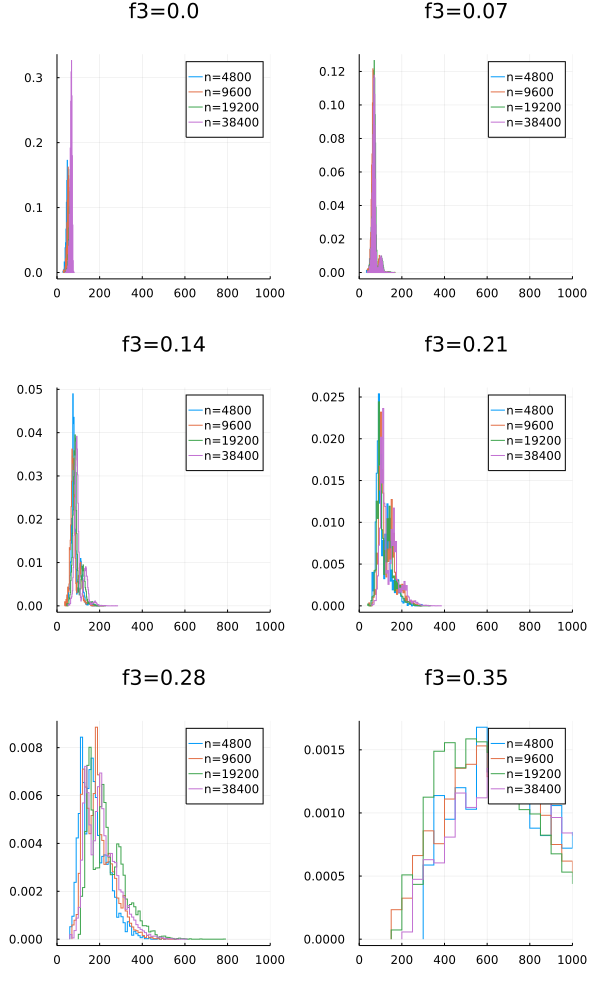

In [297]:
plts = Plots.Plot[]
for (i,f3) in pairs(f3s)
    pl = Plots.Plot()
    for (j,n) in pairs(ns)
        histogram!(pl, nflips[i][j], normalize=true, title="f3=$f3", label="n=$n", xlims=(0,1000), 
            st=:stephist)
    end
    push!(plts, pl)
end
isodd(F) && push!(plts, plot(legend=false,grid=false,foreground_color_subplot=:white))
P = plot(plts..., size=(600,1000), layout=(cld(F,2),2), margin=5Plots.mm, dpi=100)